# Ödev 1

1. Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.
2. Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım. 
3. Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.
4. Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.
5. Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.(Araştırma Ödevi)

    Kolonlar : radius_mean, area_mean, compactness_mean

## soru 1

In [1]:
import pandas as pd

In [2]:
# istenilen dataframei aşağıdaki sözlük yardımıyla oluşturacağım

data1 = {
    "nominal - animal": ["cat", "dog", "fish", "fly"], 
    "ordinal - how good are they": ["excellent", "good", "meh", "bad"],
    "interval - body temperature (°C)": [39, 38, 15, 5],
    "ratio - height (cm)": [50, 100, 5, 1]
}

In [3]:
pd.DataFrame(data1)

,nominal - animal,ordinal - how good are they,interval - body temperature (°C),ratio - height (cm)
0,cat,excellent,39,50
1,dog,good,38,100
2,fish,meh,15,5
3,fly,bad,5,1


## soru 2

In [4]:
data = pd.read_csv("data.csv")
df = data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# dataframe'i üstün körü de olsa bir inceleyelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dataframede **"Unnamed: 32"** adında boş bir sütun olduğu fark ediliyor. Bizim işimizi etkileyen bir sütun değil ama yine de silip öyle devam etmenin daha uygun olacağını düşündüm.

In [6]:
df = df.drop(columns="Unnamed: 32")
df.head()
# görüldüğü üzere 33. sütun silindi

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**count, mean, std, min, 25%, 50%, 75%, max değerleri**

In [7]:
df[["radius_mean", "area_mean", "compactness_mean"]].describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454


**radius_mean aykırı değer sayısı**

In [8]:
radius_Q1 = 11.7
radius_Q3 = 15.78
radius_IQR = radius_Q3 - radius_Q1
print("radius_mean'in IQR değeri: ", radius_IQR)

radius_mean'in IQR değeri:  4.08


In [9]:
low1 = radius_Q1 - 1.5*radius_IQR
up1 = radius_Q3 + 1.5*radius_IQR
print("alt sınır: ", low1, "üst sınır: ", up1)

alt sınır:  5.579999999999999 üst sınır:  21.9


In [10]:
rm = df[(df.radius_mean < low1) | (df.radius_mean > up1)]["radius_mean"].count()
print("radius_mean aykırı değer sayısı:", rm)

radius_mean aykırı değer sayısı: 14


**area_mean aykırı değer sayısı**

In [11]:
area_Q1 = 420.3
area_Q3 = 782.7
area_IQR = area_Q3 - area_Q1

# iqr değerini 362.40000000000003 olarak gösterdiği için yuvarlamak istedim

area_IQR = round(area_IQR, 1)
print("area_mean'in IQR değeri: ", area_IQR)

area_mean'in IQR değeri:  362.4


In [12]:
low2 = area_Q1 - 1.5*area_IQR
up2 = area_Q3 + 1.5*area_IQR
print("alt sınır: ", low2, "üst sınır: ", up2)

alt sınır:  -123.2999999999999 üst sınır:  1326.3


In [13]:
am = df[(df.area_mean < low2) | (df.area_mean > up2)]["area_mean"].count()
print("radius_mean aykırı değer sayısı:", am)

radius_mean aykırı değer sayısı: 25


**compactness_mean aykırı değer sayısı**

In [14]:
compact_Q1 = 0.06492
compact_Q3 = 0.1304
compact_IQR = compact_Q3 - compact_Q1
print("compactness_mean'in IQR değeri: ", compact_IQR)

compactness_mean'in IQR değeri:  0.06547999999999998


In [15]:
low3 = compact_Q1 - 1.5*compact_IQR
up3 = compact_Q3 + 1.5*compact_IQR
print("alt sınır: ", low3, "üst sınır: ", up3)

alt sınır:  -0.03329999999999997 üst sınır:  0.22861999999999996


In [16]:
cm = df[(df.compactness_mean < low3) | (df.compactness_mean > up3)]["compactness_mean"].count()
print("compactness_mean aykırı değer sayısı:", cm)

compactness_mean aykırı değer sayısı: 16


**Yorumlar**

Toplam 569 değer içeren sütunlar içerisinden IQR yöntemiyle radius_mean'de 14, compactness_mean'de 16 adet aykırı değer saptanmıştır. Bu aykırı değerler yüzdesel olarak %2.4-2.8 değerlerine tekabul ederken area_mean'de toplam 25 adet, yüzdesel olarak da %4.3 seviyesinde aykırı değer vardır, bu sebepten area_mean'in diğer 2 sütuna göre daha düzensiz bir dağılıma sahip olduğu söylenebilir.

Describe tablosundan da benzer çıkarımlar yapılabilir. radius_mean ve compactness_mean'in medyan ve ortalama değerleri birbirlerine yakın gözüküyor ve standart sapmaları küçük, bu sebepten daha düzenli bir dağılım olarak gözükürken area_mean'de ise durum tam tersi. Hem medyanı ve ortalaması arasındaki fark hem de standart sapması oldukça büyük gözüküyor, bu da area_mean'in düzensiz dağılımına işaret ediyor.

## soru 3

**Korelasyon - Pearson Correlation Coefficient**

In [17]:
df[["radius_mean", "area_mean", "compactness_mean"]].corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


**Spearman Rank Coefficient**

In [18]:
df[["radius_mean", "area_mean", "compactness_mean"]].corr(method='spearman')

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.999602,0.497578
area_mean,0.999602,1.000000,0.488988
compactness_mean,0.497578,0.488988,1.000000


**Kovaryans**

In [19]:
df[["radius_mean", "area_mean", "compactness_mean"]].cov()

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


**Effect Size**

Effect size için değişkenler arasındaki Cohen's d değerlerini pingouin modülü yardımıyla bulacağız.

In [20]:
import pingouin as pg

In [21]:
es1 = pg.compute_effsize(df["area_mean"], df["radius_mean"], eftype='cohen')
print("area_mean ve radius_mean grupları arasındaki etki büyüklüğü değeri: ", es1)

area_mean ve radius_mean grupları arasındaki etki büyüklüğü değeri:  2.5748571535813936


In [22]:
es2 = pg.compute_effsize(df["area_mean"], df["compactness_mean"], eftype='cohen')
print("area_mean ve compactness_mean grupları arasındaki etki büyüklüğü değeri: ", es2)

area_mean ve compactness_mean grupları arasındaki etki büyüklüğü değeri:  2.6313393087695855


In [23]:
es3 = pg.compute_effsize(df["radius_mean"], df["compactness_mean"], eftype='cohen')
print("radius_mean ve compactness_mean grupları arasındaki etki büyüklüğü değeri: ", es3)

radius_mean ve compactness_mean grupları arasındaki etki büyüklüğü değeri:  5.626829112228556


**Yorumlar**

**Kovaryans** değerlerine baktığımızda bu 3 sütunun birbiryle pozitif doğrultuda bir ilişkisi olduğunu söyleyebiliyoruz. Sadece kovaryans değerlerini göz önüne alırsak radius_mean ve area_mean arasında daha yüksek bir yakınlık olduğu, radius_mean ve compactness_mean arasında ise düşük bir yakınlık olduğunu söylenebilir ancak netleştirmek adına korelasyon değerleri de incelenmeli. **Korelasyon** değerlerine baktığımızda da radius_mean ve area_mean arasında (yarıçapın alanı direkt etkilediğinin bilinmesinden dolayı bekleneceği üzere) çok yüksek, neredeyse maksimum seviyede bir pozitif doğrusal ilişki olduğu gözlenebiliyor. Bu değerlerin compactness_mean'le olan korelasyonlarını incelediğimizde ise kendi aralarındaki yükseklikte olmasa da bir pozitif doğrusal ilişki içinde oldukları gözlenebiliyor. **Pearson Correlation Coefficient** düzenli dağılımlarda kullanılıyor, **Spearman Rank Coefficient** ise düzensiz dağılımlarda ancak örnekte iki katsayının değerleri birbirlerine çok yakın olduğundan 2 korelasyon değeri için de aynı yorumlar yapılabilir.

**Effect size** için değişkenler arasındaki **Cohen's d** değerlerini incelediğimizde hepsinin 0.8'den büyük olduğunu gözlemliyoruz. Cohen's d değeri 0.8'den büyük olduğunda 2 değişken arasında yüksek etki büyüklüğü olduğu kabul ediyor. Bu sebeple tüm değerlerin birbirine etkisinin yüksek olduğunu söyleyebiliriz, özellikle radius_mean ve compactness_mean arasında çok yüksek bir etki büyüklüğü olduğu gözlemlenebiliyor.

## soru 4

**Bayes Teoremi** gerçek hayatta;

1. Spam maillerin tespitinde, 1 kelimenin spam maillerde ve gerçek maillerde geçme oranını bulup buradan teoremi uygulama vasıtasıyla kullanılır.
2. Nesne tanımada cisimlerin piksellerindeki RGB değerlerinin bilinen cisimlerdeki oranları yardımıyla kullanılabilir.
3. Tıpta istatistiksel veri kullanan tarama testlerine göre kişilerin hasta olup olmama olasılıklarını hesaplamada kullanılır. Örneğin %1 oranında görülen bir hastalığın testinin doğru sonuç verme olasılığı %99 olarak hesaplanmış olsun. Buradan testi pozitif çıkmış bir kişinin gerçekten hasta olma olasılığı teorem yardımıyla hesaplanabilir.
4. Testlerin duyarlılığını belirlemede kullanılır. Örneği yalan makinesi testinde makinenin söylenen yalanı %72 oranla yakaladığını varsayalım. Bugüne kadar test edilen insanların da %98'inin doğru kalanının yalan söylediğini düşünelim. Buradan yola çıkarak teste giren kişiye makine doğru söylüyor dediğinde yanılıyor olma olasılığını bu teorem yardımıyla hesaplayabiliriz.
5. Antivirüs yazılımlarında da spam maillere benzer mantıkla kullanılmaktadır.

## soru 5

İstenilen 5 olasılık dağılımının (Poisson, Normal , Gamma, Weibull ve Logaritmik dağılımların) benzer ve farklı yönlerinin tablosu aşağıdadır.

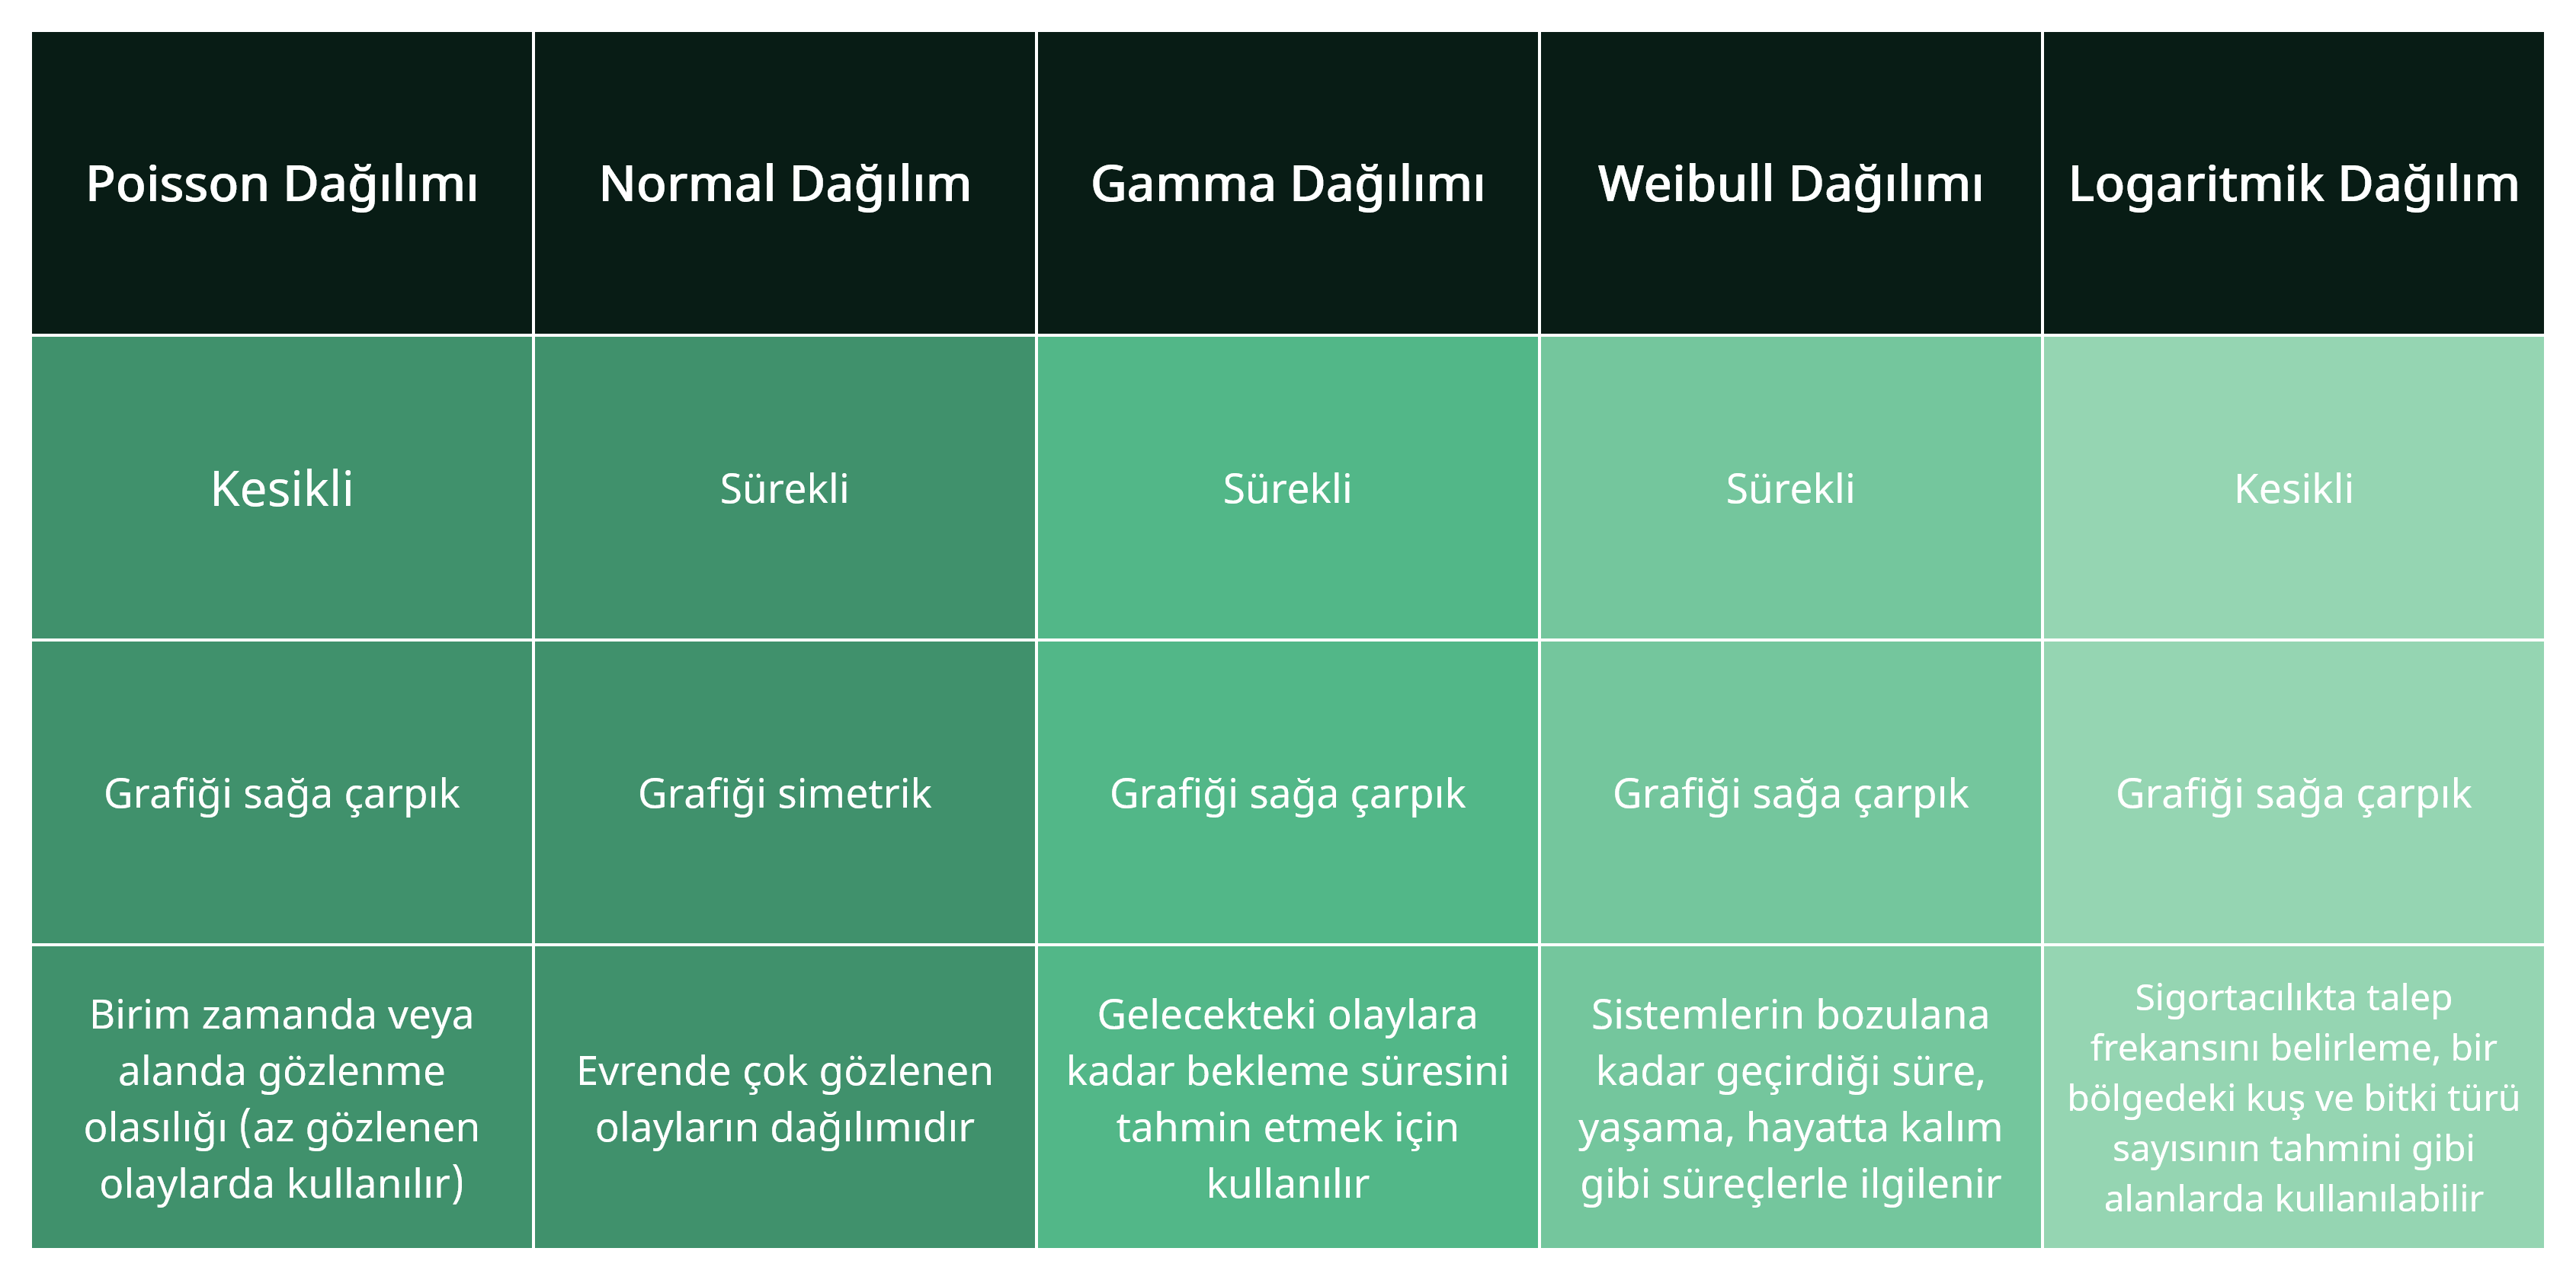